In [2]:
import scipy as sp
import numpy as np

In [52]:
%matplotlib inline
def rosenbrock(x, y):
      return (1-x)**2 + 100* ((y-x**2))**2
def rosenbrock_arr(X):
      return (1-X[:, 0])**2 + 100* ((X[:, 1]-X[:, 0]**2))**2
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
def himmelblau_arr(X):
    return (X[:, 0]**2 + X[:, 1] - 11)**2 + (X[:, 0] + X[:, 1]**2 - 7)**2
def eggholder_arr(X):
    mask = ((X > 512).astype(int) | (X < -512).astype(int)).any(axis=1)
    f = -(X[:, 1]+47) * np.sin(np.sqrt(np.abs( X[:, 0] / 2.0 + (X[:, 1]+47) ))) - X[:, 0]*np.sin(np.sqrt(np.abs(X[:, 0]-(X[:, 1]+47))))
    f[mask] = np.Inf
    return f
def eggholder(X, Y):
    return -(Y+47) * np.sin(np.sqrt(np.abs( X / 2.0 + (Y+47) ))) - X*np.sin(np.sqrt(np.abs(X-(Y+47))))
    


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

fig = plot.figure()
ax = fig.gca(projection='3d')

s = 0.1   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-512, 512., s)   #Could use linspace instead if dividing
Y = np.arange(-512, 512., s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
#Z = eggholder(X,Y) #(1.-X)**2 + 100.*(Y-X*X)**2

print(np.unravel_index(Z.argmin(), Z.shape))

surf = ax.plot_surface(X, Y, Z, cmap=cm.hsv,)  #Try coolwarm vs jet
 
#Displays the figure, handles user interface, returns when user closes window
plot.show()

[512.         404.23180524] [-959.64066272 -959.64066272 -959.64066272 ... -959.64066272 -959.64066272
 -959.64066272]


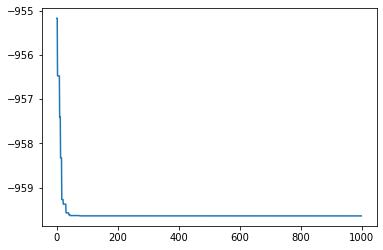

In [53]:
N_PARTICLES    = 10000
omega          = np.random.uniform(0.5, 0.9)
V              = np.random.uniform(-10, 10, (N_PARTICLES, 2))
P              = np.random.uniform(-512, +512, (N_PARTICLES, 2))
best_P         = P
best_swarm_P   = np.full_like(best_P, best_P[np.argmin(rosenbrock(best_P[:, 0], best_P[:, 1]))])
fitness = []
f = eggholder_arr
for i in range(1000):
    r1 = np.random.uniform(0, 1, (N_PARTICLES, 2))
    r2 = np.random.uniform(0, 1, (N_PARTICLES, 2))
    V = omega*V + r1 * (best_P - P) + r2 * (best_swarm_P - P)
    P = P + V
    best_P[f(P) < f(best_P)] = P[f(P) < f(best_P)]
    best_swarm_P   = np.full_like(best_P, best_P[np.argmin(f(best_P))])
    fitness.append(f(best_swarm_P)[0])
plot.plot(fitness)
print(best_swarm_P[0], f(best_swarm_P[:]))

In [53]:
best_P[rosenbrock_arr(P) < rosenbrock_arr(best_P)] = P[rosenbrock_arr(P) < rosenbrock_arr(best_P)]

In [54]:
print(eggholder(512, 404.2319))

-959.6406627106155


In [65]:
print(fitness)

KeyboardInterrupt: 